# K-Means Clustering

## Clustering

Let’s suppose we give a child different objects to group. How does a child make a group? The child may group over the colour, over the shape, over the hardness or softness of the objects etc. The basic idea here is that the child tries to find out similarities and dissimilarities between different objects and then tries to make a group of similar objects. This is called **clustering**, the method of identifying similar instances and keeping them together.
In Other words, clustering identifies homogeneous subgroups among the observations.


Clustering is an unsupervised approach which finds a structure/pattern in a collection of unlabeled data.
A cluster is a collection of objects which are “similar” amongst themselves and are “dissimilar” to the objects belonging to a different cluster.

In the figure above, we can easily identify 4 different clusters. The clustering criteria here is distance. Whichever points are near to each other are kept in the same cluster and the faraway points belong to a different cluster

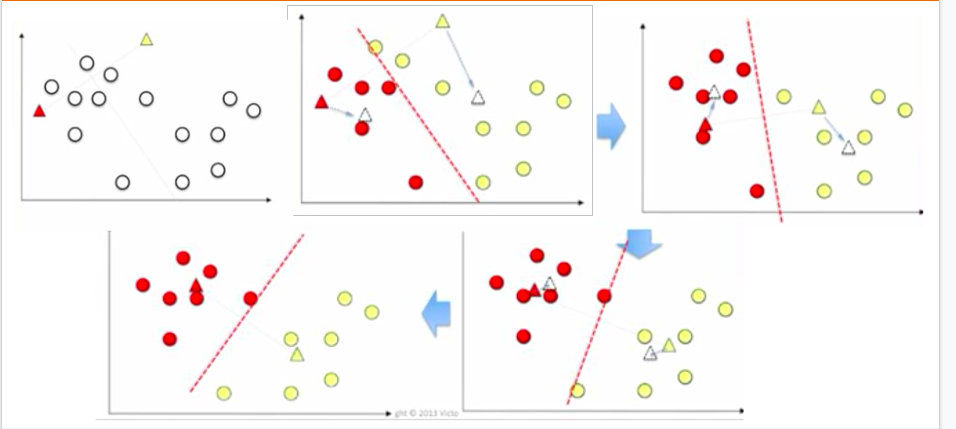

## Problem statement: With the iris dataset we need to cluster iris flowers into certain groups.

In [92]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # To hide the warnings
warnings.filterwarnings('ignore')

In [94]:
# Load the dataset
data = pd.read_csv('iris.csv')
data1=pd.read_csv('iris.csv')

In [96]:
data.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [98]:
# Quick summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   target        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [100]:
# Statistical information of the dataset
data.describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [102]:
# Check for null values
data.isnull().sum()
# there are no null values

Unnamed: 0      0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

# Task: 
- Perform EDA.
- Impute the outliers if present.
- Check for corrupt data.

In [104]:
data.drop(['Unnamed: 0','target'], axis=1, inplace=True)

In [106]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Elbow Technique

Elbow method is the most popular method that is used to determine the optimal value of k.

**How it works?**

- Start with some K.
- Calculate WCSS (Within Cluster Sum of squared errors) ie., for each of the cluster, it calculate the distance of individual data points from the centroid, then square it and sum it up.
             WCSS = WCSS1 + WCSS2 + ..... WCSSk
             
- Take new value for K, repeat step2. 
- For each number of K, WCSS is calculated. 
- Find the elbow point. That is the optimal value of K.

[WCSS.png](attachment:WCSS.png)
 As the number of K increases, the error reduces. 
 


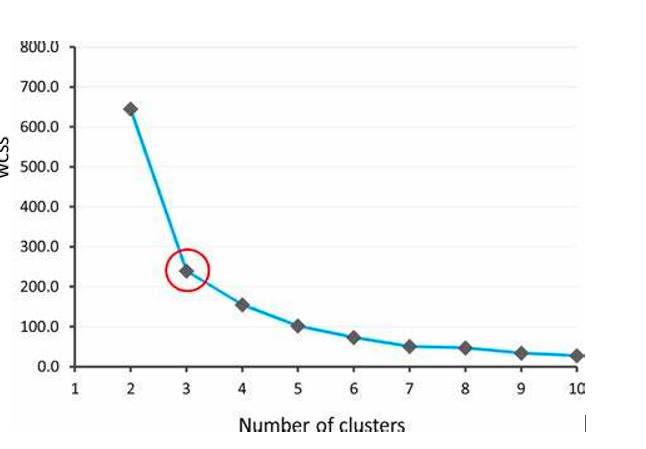

In [17]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Determine K using elbow method

In [108]:
# Elbow method
from sklearn.cluster import KMeans
wcss=[]
for k in range (1,11):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.31787321428571, 46.535582051282056, 46.143313600891865, 40.094951036682616, 29.914633449883453, 34.38249016636958, 26.840608728990308]


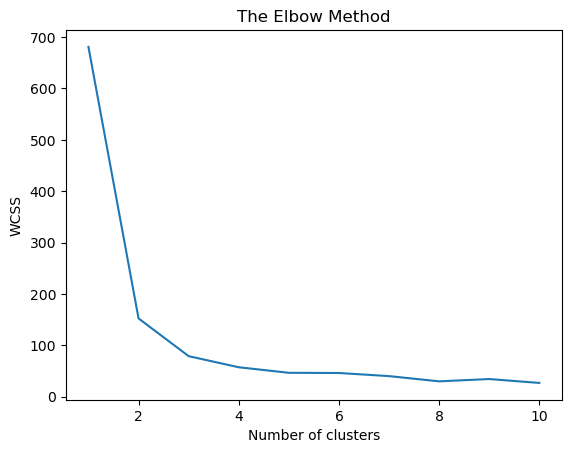

In [112]:
sns.lineplot(x=range(1,11),y=wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie., the point after which the distortion/inertia start decreasing in a linear fashion.

In [114]:
# We will take the optimal value of k as 3
model = KMeans(n_clusters=3)
#Training the model
model.fit(data)

KMeans(n_clusters=3)

In [120]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
model.labels_ #Predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [122]:
# Set colours to the clusters to differentiate(Not required in main implementation)
color_scheme = np.array(['red','blue','green','yellow','pink','cyan'])
color_scheme

array(['red', 'blue', 'green', 'yellow', 'pink', 'cyan'], dtype='<U6')

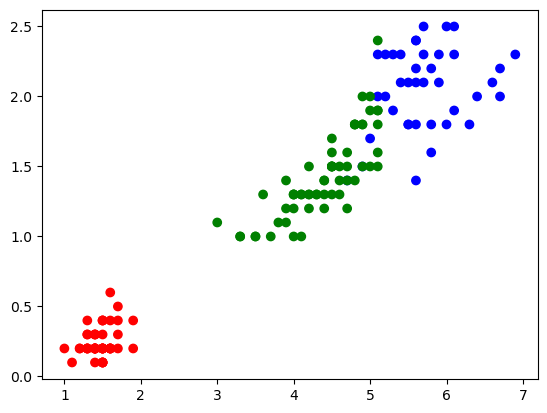

In [124]:
# Prediction from model
# visualize the clusters formed by the model(Not required in main impelemntation)
plt.scatter(data["petal_length"],data["petal_width"],color=color_scheme[model.labels_])
plt.show()

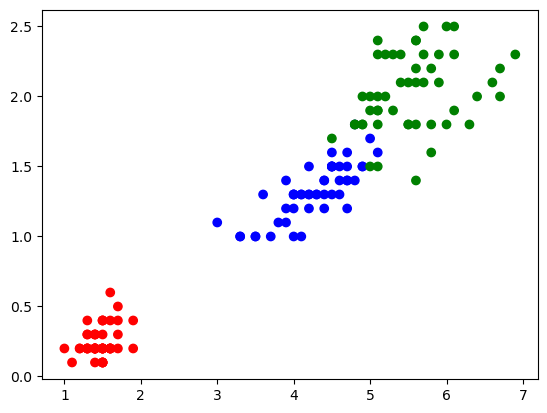

In [126]:
#Actual Labels
plt.scatter(data["petal_length"],data["petal_width"],color=color_scheme[data1.target])
plt.show()

### Evaluation Metrics:

In [128]:
from sklearn.metrics import silhouette_score
score=silhouette_score(data,model.labels_)
score #K=3

0.5509643746707443

# Assumptions:
- Clusters are spherical shaped.
- All the features are scaled.(Scaling)
- Clusters are of similar size

# Advantages
- Simple and easy to implement
- Easy to interret
- It works well even when some asssumptions are broken.

# Disadvantage
- Sensitive to outliers
- K-vlaue has to be know before.